In [2]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

n = 10
probs = np.random.rand(n) #A
eps = 0.1

In [3]:
probs

array([0.44627151, 0.68041604, 0.22450424, 0.25127605, 0.23611878,
       0.6173479 , 0.60477014, 0.92174936, 0.39311652, 0.7388011 ])

In [4]:
def get_reward(prob, n=10):
    reward = 0;
    for i in range(n):
        if random.random() < prob:
            reward += 1
    return reward

In [5]:
reward_test = [get_reward(0.7) for _ in range(2000)]

In [6]:
np.mean(reward_test)

7.018

(array([  3.,  18.,  63., 195., 431., 522., 460., 251.,  57.]),
 array([ 2.        ,  2.88888889,  3.77777778,  4.66666667,  5.55555556,
         6.44444444,  7.33333333,  8.22222222,  9.11111111, 10.        ]),
 <BarContainer object of 9 artists>)

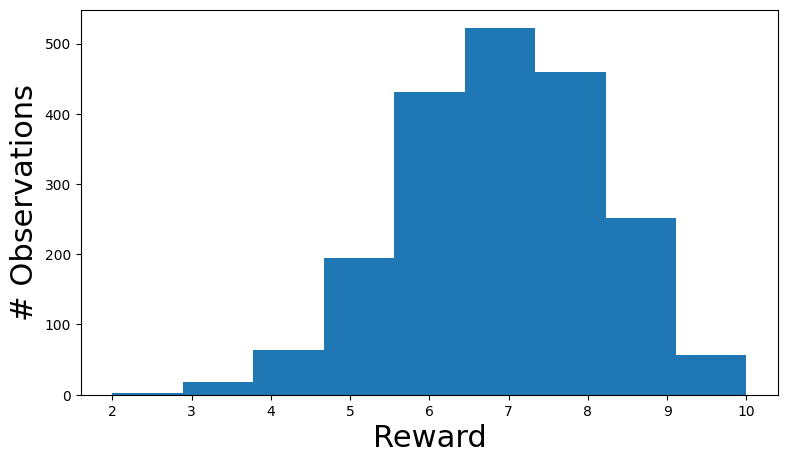

In [7]:
plt.figure(figsize=(9,5))
plt.xlabel("Reward",fontsize=22)
plt.ylabel("# Observations",fontsize=22)
plt.hist(reward_test,bins=9)

In [8]:
record = np.zeros((n,2))

In [9]:
record

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [10]:
def get_best_arm(record):
    arm_index = np.argmax(record[:,1],axis=0)
    return arm_index

In [11]:
def update_record(record,action,r):
    new_r = (record[action,0] * record[action,1] + r) / (record[action,0] + 1)
    record[action,0] += 1
    record[action,1] = new_r
    return record

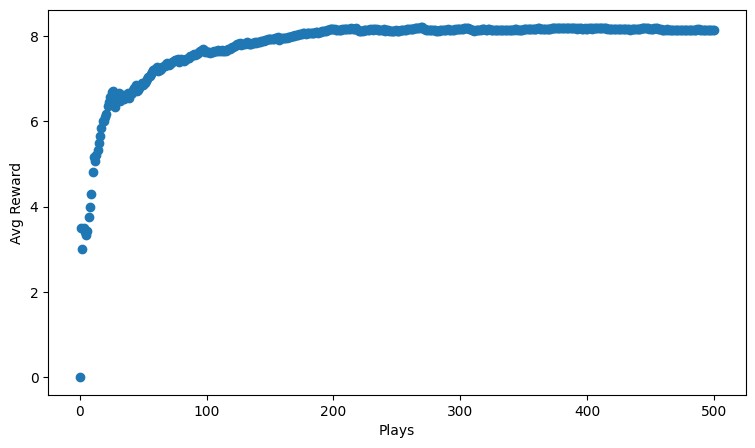

In [12]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
rewards = [0]
for i in range(500):
    if random.random() > 0.2:
        choice = get_best_arm(record)
    else:
        choice = np.random.randint(10)
    r = get_reward(probs[choice])
    record = update_record(record,choice,r)
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)),rewards)

In [13]:
import numpy as np
np_array_2d = np.arange(0, 6).reshape([2, 3])

print(np_array_2d)
#[[0 1 2]
# [3 4 5]]


# 压缩成一行
a = np.sum(np_array_2d, axis = 0)
print(a)  # [3 5 7]

# 压缩成一列
b = np.sum(np_array_2d, axis = 1)
print(b)  # [ 3 12]


[[0 1 2]
 [3 4 5]]
[3 5 7]
[ 3 12]


In [14]:
record[:,1]

array([4.52941176, 6.75      , 1.75      , 1.36363636, 1.28571429,
       5.41666667, 6.28571429, 9.21994885, 4.2       , 7.66666667])

In [19]:
np.argmax(record, axis=0)

array([7, 7], dtype=int64)

In [21]:
record

array([[ 17.        ,   4.52941176],
       [ 12.        ,   6.75      ],
       [ 16.        ,   1.75      ],
       [ 11.        ,   1.36363636],
       [  7.        ,   1.28571429],
       [ 12.        ,   5.41666667],
       [  7.        ,   6.28571429],
       [391.        ,   9.21994885],
       [ 15.        ,   4.2       ],
       [ 12.        ,   7.66666667]])

In [22]:
def softmax(av, tau=1.12):
    softm = ( np.exp(av / tau) / np.sum( np.exp(av / tau) ) )
    return softm

In [23]:
probs

array([0.44627151, 0.68041604, 0.22450424, 0.25127605, 0.23611878,
       0.6173479 , 0.60477014, 0.92174936, 0.39311652, 0.7388011 ])

In [34]:
record = np.zeros((n,2))

In [25]:
record

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

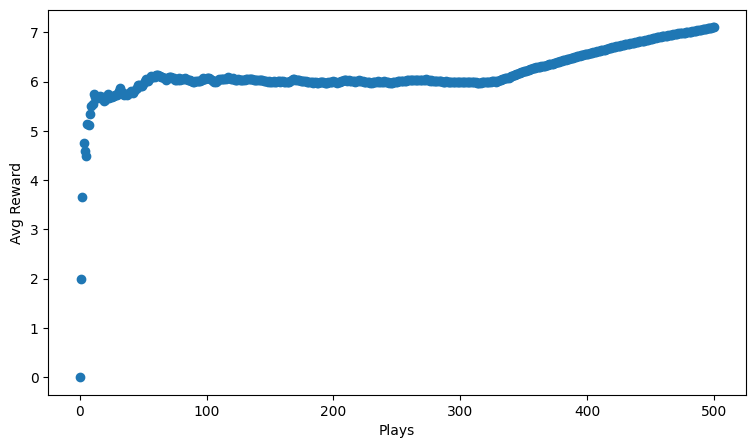

In [35]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
rewards = [0]
for i in range(500):
    p = softmax(record[:,1],tau=0.7)
    choice = np.random.choice(np.arange(n),p=p)
    r = get_reward(probs[choice])
    record = update_record(record,choice,r)
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)),rewards)

In [33]:
# p = softmax(record[:,1],tau=0.7)
record[:,1]

array([0.        , 6.83622995, 1.5       , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [29]:
probs

array([0.44627151, 0.68041604, 0.22450424, 0.25127605, 0.23611878,
       0.6173479 , 0.60477014, 0.92174936, 0.39311652, 0.7388011 ])

In [30]:
record

array([[  0.        ,   0.        ],
       [997.        ,   6.80541625],
       [  3.        ,   1.33333333],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ],
       [  0.        ,   0.        ]])

In [31]:
softmax(record[:,1],tau=0.7)

array([5.98957423e-05, 9.99118466e-01, 4.02368094e-04, 5.98957423e-05,
       5.98957423e-05, 5.98957423e-05, 5.98957423e-05, 5.98957423e-05,
       5.98957423e-05, 5.98957423e-05])